In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as sts
import math
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import rc,rcParams
from matplotlib.ticker import FormatStrFormatter
#rcParams['font.sans-serif'] = "Helvetica Neue LT Std"
#rcParams['font.family'] = "sans-serif"

direc = 'C:/Users/svo/Google Drive/Bas Games/'
fig_direc = 'C:/Users/svo/Google Drive/Bas Games/Figures/'

In [5]:
rcParams['figure.figsize'] = (8,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

#rcParams['font.sans-serif'] = "Helvetica Neue LT Std"
#rcParams['pdf.fonttype'] = 42
#rcParams['text.usetex'] = True
#prop = font_manager.FontProperties(fname='C:/Windows/Fonts/HelveticaNeueLTCom-Roman.ttf')
#rcParams['text.latex.preamble']=r'\usepackage{amsmath}\n\usepackage{amsfonts}'

In [6]:
P = np.loadtxt(direc + 'Analysis/Generalization/prediction_2afc_final.txt')
accuracy_2afc_model = [100*np.mean(np.mean(P[P[:,0]==i,1:],axis=1)>0.5) for i in range(40)]
prediction_2afc_model = [np.mean(P[P[:,0]==i,1:],axis=1)>0.5 for i in range(40)]

P = np.loadtxt(direc + 'Analysis/Generalization/prediction_eval_final.txt')
accuracy_eval_model = [np.corrcoef(np.mean(P[P[:,0]==i,2:],axis=1),P[P[:,0]==i,1])[0,1] \
                      for i in range(40)]
prediction_eval_model = [np.mean(P[P[:,0]==i,2:],axis=1) for i in range(40)]
eval_moves = [P[P[:,0]==i,1] for i in range(40)]

P = np.loadtxt(direc + 'Analysis/Generalization/performance_gen_2afc.txt')
accuracy_2afc_oracle = [100*np.mean(P[P[:,0]==i,1]) for i in range(40)]
prediction_2afc_oracle = [P[P[:,0]==i,1] for i in range(40)]

P = np.loadtxt(direc + 'Analysis/Generalization/performance_gen_eval.txt')
accuracy_eval_oracle = [np.corrcoef(P[P[:,0]==i,1],P[P[:,0]==i,2])[0,1] for i in range(40)]
prediction_eval_oracle = [P[P[:,0]==i,2] for i in range(40)]

P = np.loadtxt(direc + 'Analysis/Generalization/mean_across_subjects_2afc.txt')
accuracy_2afc_map = [100*np.mean(P[P[:,0]==i,1]) for i in range(40)]
prediction_2afc_map = [P[P[:,0]==i,1] for i in range(40)]

P = np.round(np.loadtxt(direc + 'Analysis/Generalization/mean_across_subjects_eval.txt'))
accuracy_eval_map = [np.corrcoef(P[P[:,0]==i,1],P[P[:,0]==i,2])[0,1] for i in range(40)]
prediction_eval_map = [P[P[:,0]==i,2] for i in range(40)]

P = np.loadtxt(direc + 'Analysis/Loglik/loglik_gen_final.txt')
loglik_games = -np.mean(np.reshape(np.mean(P,axis=1),[40,5]),axis=1)


In [7]:
def report_significance(p):
    if p>0.05:
        return "p=%(p).02f" % {'p':p}
    elif p>0.01:
        return "p<0.05"
    elif p>0.001:
        return "p<0.01"
    else:
        return "p<0.001"
    
def print_mean_and_sem(name,x,fmt):
    return "$" + name + ("=%(m)" + fmt + "\\pm %(sem)" + fmt + " ") % {'m': np.mean(x), 
                                                      'sem': np.std(x)/np.sqrt(len(x))} + "$"

def print_mean_and_sem_and_p(name,x,baseline,fmt):
    d = {'m': np.mean(x),'sem': np.std(x)/np.sqrt(len(x))}
    return "$" + name + ("=%(m)" + fmt + "\\pm %(sem)" + fmt + ", ") % d + \
    report_significance(sts.ttest_1samp(x,popmean=baseline).pvalue) + "$"

$\rho=58.61\pm 1.03, p<0.001$ Ttest_1sampResult(statistic=8.262332753800088, pvalue=4.2425492062987757e-10)


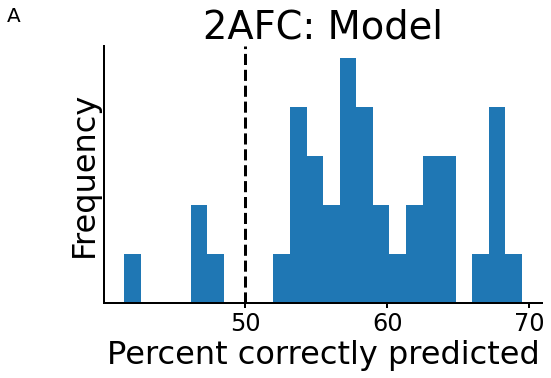

$\rho=55.26\pm 0.99, p<0.001$ Ttest_1sampResult(statistic=5.227989729576151, pvalue=6.0854623572896405e-06)


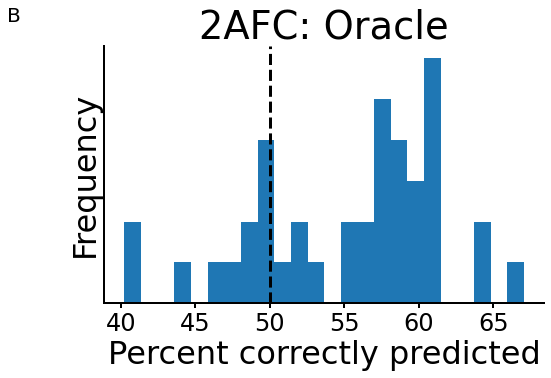

$\rho=60.49\pm 1.35, p<0.001$ Ttest_1sampResult(statistic=7.670508641137124, pvalue=2.6197180021544663e-09)


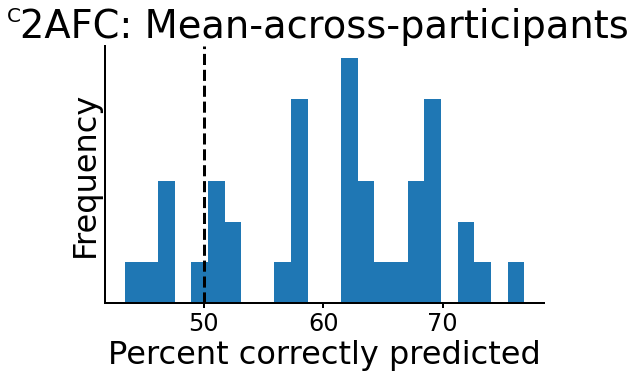

$\rho=0.38\pm 0.04, p<0.001$ Ttest_1sampResult(statistic=-1267.1620379628464, pvalue=1.3144052726975005e-91)


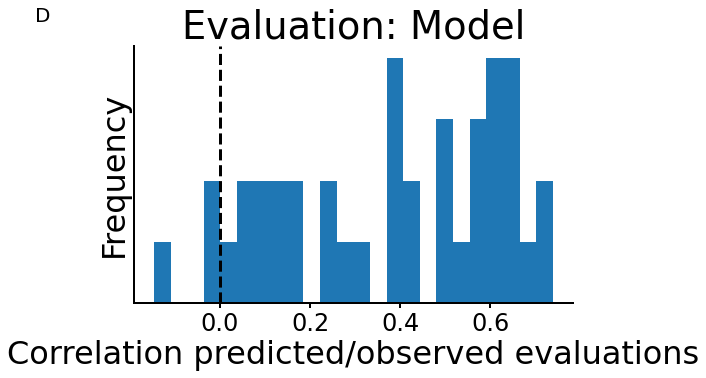

$\rho=0.30\pm 0.03, p<0.001$ Ttest_1sampResult(statistic=-1453.9335353938184, pvalue=6.165863900846494e-94)


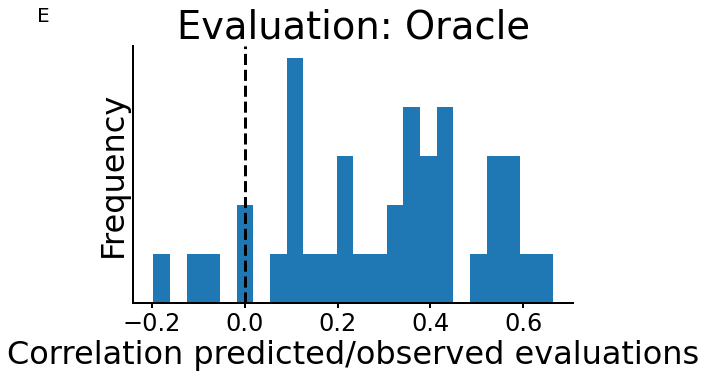

$\rho=0.39\pm 0.04, p<0.001$ Ttest_1sampResult(statistic=-1258.4457116443225, pvalue=1.7204243327353713e-91)


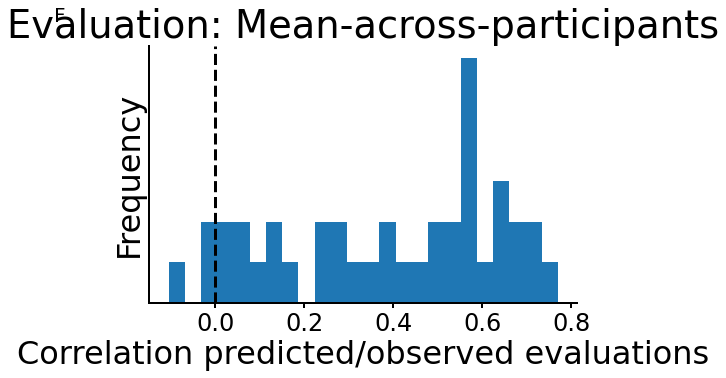

In [8]:
import string
letters = list(string.ascii_uppercase)

models = ['Model','Oracle','Mean-across-participants']
data = ['2AFC','Evaluation']

for i,acc in enumerate([accuracy_2afc_model,accuracy_2afc_oracle,accuracy_2afc_map,
                        accuracy_eval_model,accuracy_eval_oracle,accuracy_eval_map]):
    fig,ax=plt.subplots()
    ax.set_title(data[i//3] + ': ' + models[i%3])
    ax.set_ylabel('Frequency')
    ax.set_yticks([])
    if(i<3):
        ax.axvline(x=50,linestyle='dashed',color='black')
        ax.set_xlabel('Percent correctly predicted')
    else:
        ax.axvline(x=0,linestyle='dashed',color='black')
        ax.set_xlabel('Correlation predicted/observed evaluations')
    ax.hist(acc,24)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.02, 0.9, letters[i], horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)

    fig.tight_layout()
    fig.savefig(fig_direc + 'generalization1_' + letters[i] + '.pdf')
    print(print_mean_and_sem_and_p("\\rho",acc,0,".02f"),sts.ttest_1samp(acc,popmean=50))
    plt.show()

In [10]:
m,s =zip(*[(100*np.mean(p),100*np.std(p)/np.sqrt(len(p))) for p in accuracy_2afc_model])
fig,ax=plt.subplots()
ax.axhline(50,linestyle='dashed',color='black')
ax.errorbar(x=range(1,41),y=np.sort(m),yerr=np.array(s)[np.argsort(m)],marker='p')
ax.set_ylabel('Percent correctly\npredicted')
ax.set_xlabel('Participant',labelpad=-5)
ax.set_xticks([1,40])
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.25,top=0.95)
fig.savefig(fig_direc+'2afc.pdf')
plt.show()

TypeError: object of type 'numpy.float64' has no len()

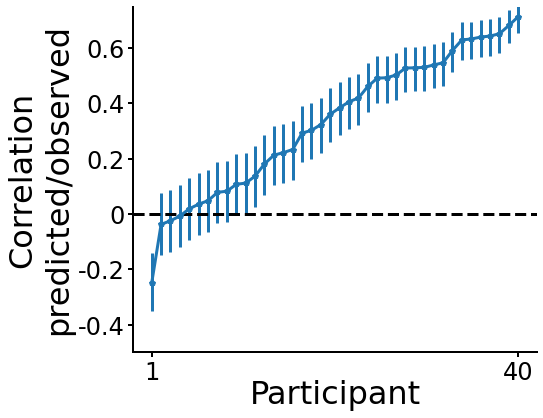

In [11]:
P = np.loadtxt(direc + 'Analysis/Generalization/performance_gen_eval.txt')
fig,ax=plt.subplots()
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
m = np.array([sts.spearmanr(e1,e2).correlation for e1,e2 in zip(prediction_eval_model,eval_moves)])
lower = m-np.tanh(np.arctanh(m) - 1/np.sqrt(79))
upper = np.tanh(np.arctanh(m) + 1/np.sqrt(79))-m
ax.axhline(0,linestyle='dashed',color='black')
ax.errorbar(x=range(1,41),y=np.sort(m),yerr=[np.array(lower)[np.argsort(m)],np.array(upper)[np.argsort(m)]],marker='p')
ax.set_ylabel('Correlation\npredicted/observed')
ax.set_xlabel('Participant',labelpad=-5)
ax.set_xticks([1,40])
ax.set_ylim([-0.5,0.75])
fig.subplots_adjust(bottom=0.15,right=0.95,left=0.25,top=0.95)
fig.savefig(fig_direc+'eval.pdf')
plt.show()

In [12]:
upper

array([0.09362934, 0.09153322, 0.10826789, 0.11212087, 0.10942294,
       0.05566304, 0.10392004, 0.10445969, 0.10926051, 0.08054227,
       0.11227554, 0.08814242, 0.08947173, 0.11235009, 0.09919249,
       0.11037724, 0.08035329, 0.07491032, 0.11175729, 0.07627975,
       0.06266951, 0.0967978 , 0.05998755, 0.0984095 , 0.10810233,
       0.06170522, 0.11117084, 0.06118795, 0.07396736, 0.07598739,
       0.06830121, 0.10620027, 0.1114454 , 0.05085585, 0.11024766,
       0.0761616 , 0.06313006, 0.07924188, 0.08381627, 0.10322707])

In [13]:
[sts.spearmanr(e1,e2).correlation for e1,e2 in zip(prediction_eval_model,eval_moves)]

[0.36121408561971985,
 0.38446550069409674,
 0.1370924240841215,
 -0.007179073363621035,
 0.10752523059486134,
 0.6820592507940744,
 0.2221645167310626,
 0.2130166287252131,
 0.1119879915018193,
 0.4914509582642796,
 -0.024239764766684723,
 0.41983883196466126,
 0.406270285438122,
 -0.03729880522221862,
 0.29260372725733735,
 0.07843549116504131,
 0.4931220610202989,
 0.5394143333409965,
 0.019049486933441957,
 0.5280818595357624,
 0.6332062546890949,
 0.3235656549649451,
 0.6522604518524163,
 0.3030037204826093,
 -0.24908009821669233,
 0.6401106805892952,
 0.04841438656848102,
 0.6437892783776309,
 0.5471052567647523,
 0.5305179062352978,
 0.5915749456784071,
 0.1812319043230519,
 0.03582330883497829,
 0.7139801377348092,
 0.08273419801238932,
 0.5290674839052544,
 0.6298868295640152,
 0.5028578806948342,
 0.4617190290292674,
 0.2335068626075777]

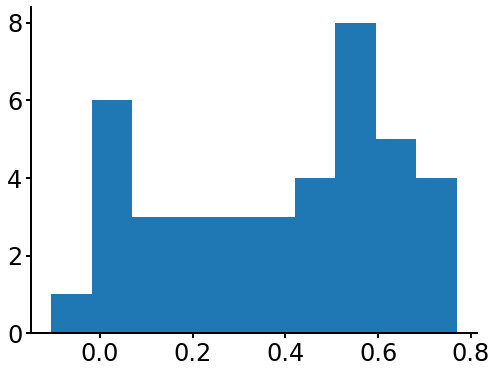

eval: $\rho=0.39\pm 0.04, p<0.001$


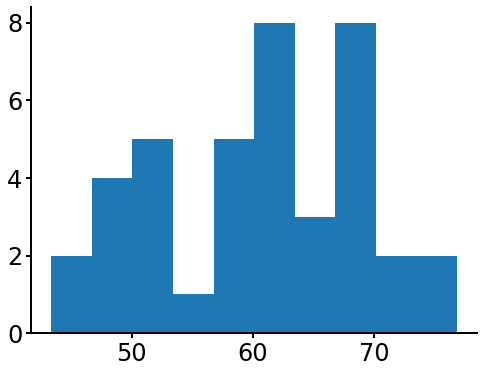

2afc: $p_{\text{correct}}=60.490\pm 1.350, p<0.001$


In [14]:
plt.hist(accuracy_eval_map,10)
plt.show()
print("eval:",print_mean_and_sem_and_p("\\rho",accuracy_eval_map,0,".02f"))

plt.hist(accuracy_2afc_map,10)
plt.show()
print("2afc:",print_mean_and_sem_and_p("p_{\\text{correct}}",accuracy_2afc_map,0.5,".03f"))

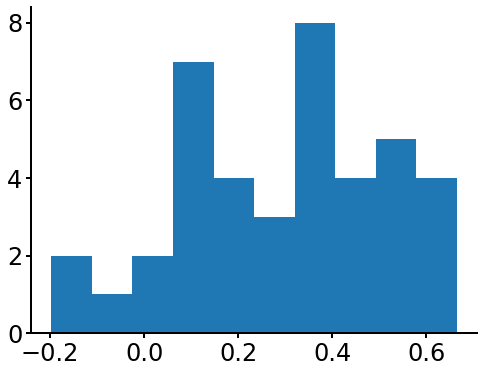

eval: $\rho=0.30\pm 0.03, p<0.001$


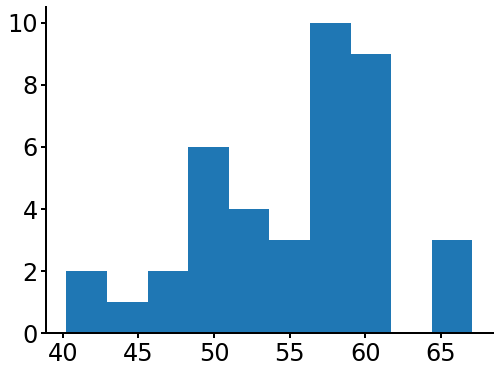

2afc: $p_{\text{correct}}=55.261\pm 0.994, p<0.001$


In [15]:
plt.hist(accuracy_eval_oracle,10)
plt.show()
print("eval:",print_mean_and_sem_and_p("\\rho",accuracy_eval_oracle,0,".02f"))

plt.hist(accuracy_2afc_oracle,10)
plt.show()
print("2afc:",print_mean_and_sem_and_p("p_{\\text{correct}}",accuracy_2afc_oracle,0.5,".03f"))

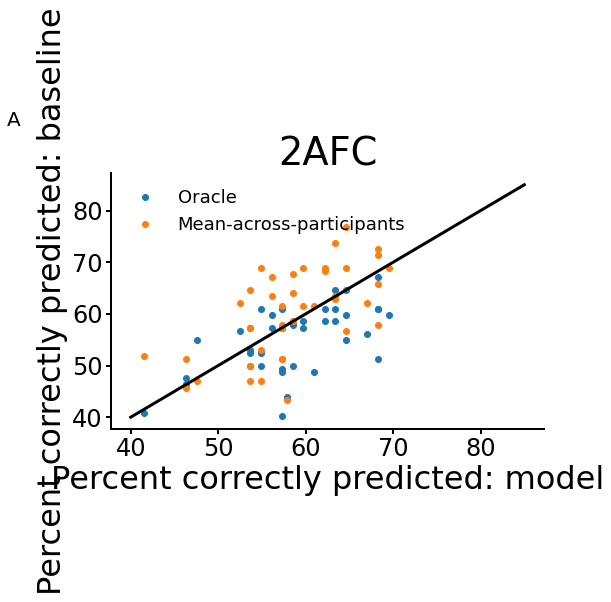

SpearmanrResult(correlation=0.6166136622299679, pvalue=2.2674949554578755e-05)
SpearmanrResult(correlation=0.5558911264395583, pvalue=0.00019607759712510813)


In [16]:
fig,ax=plt.subplots()
ax.set_title('2AFC')
ax.set_xlabel('Percent correctly predicted: model')
ax.set_ylabel('Percent correctly predicted: baseline')
plt.plot(accuracy_2afc_model,accuracy_2afc_oracle,'o',label='Oracle')
plt.plot(accuracy_2afc_model,accuracy_2afc_map,'o',label = 'Mean-across-participants')
plt.legend(frameon=False)
plt.plot([40,85],[40,85],'-k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.95, 'A', horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)

fig.tight_layout()
fig.savefig(fig_direc + 'generalization2_A.pdf')
plt.show()

print(sts.spearmanr(accuracy_2afc_model,accuracy_2afc_map))
print(sts.spearmanr(accuracy_2afc_model,accuracy_2afc_oracle))

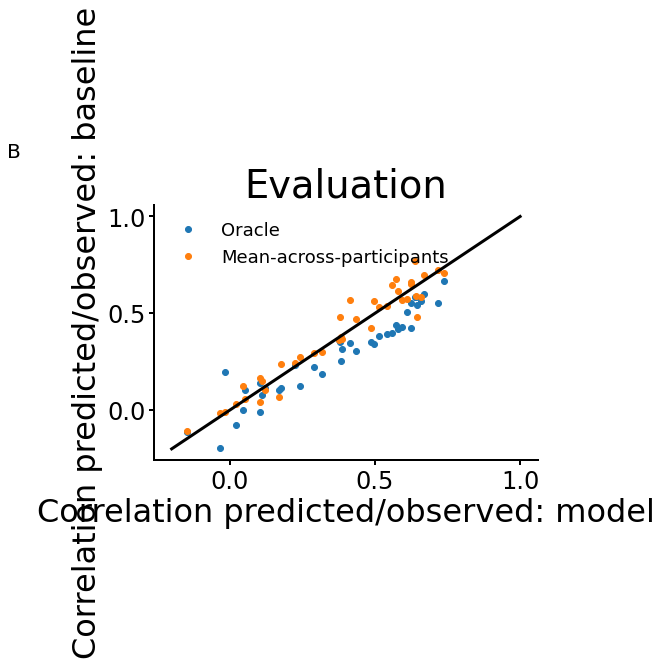

SpearmanrResult(correlation=0.9491557223264541, pvalue=1.1385470081666868e-20)
SpearmanrResult(correlation=0.9602251407129457, pvalue=1.18108805049682e-22)


In [17]:
fig,ax=plt.subplots()
ax.set_title('Evaluation')
ax.set_xlabel('Correlation predicted/observed: model')
ax.set_ylabel('Correlation predicted/observed: baseline')
plt.plot(accuracy_eval_model,accuracy_eval_oracle,'o',label='Oracle')
plt.plot(accuracy_eval_model,accuracy_eval_map,'o',label = 'Mean-across-participants')
plt.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.95, 'B', horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)

plt.plot([-0.2,1],[-0.2,1],'-k')
fig.tight_layout()
fig.savefig(fig_direc + 'generalization2_B.pdf')
plt.show()

print(sts.spearmanr(accuracy_eval_model,accuracy_eval_map))
print(sts.spearmanr(accuracy_eval_model,accuracy_eval_oracle))

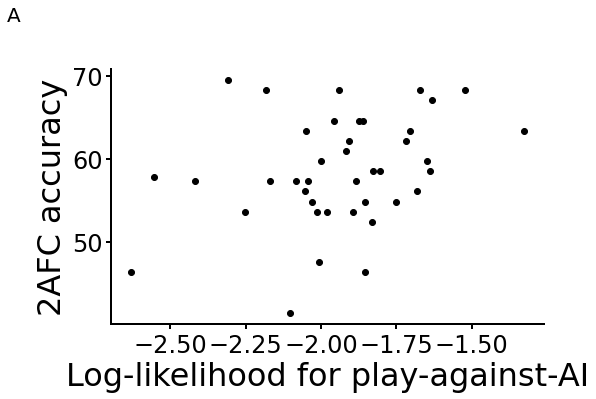

2afc-games: SpearmanrResult(correlation=0.2863605007082664, pvalue=0.07322947573326681)


In [18]:
fig,ax=plt.subplots()
ax.set_xlabel('Log-likelihood for play-against-AI')
ax.set_ylabel('2AFC accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.95, 'A', horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
plt.plot(loglik_games,accuracy_2afc_model,'ok')
fig.tight_layout()
fig.savefig(fig_direc + 'generalization3_A.pdf')
plt.show()
print("2afc-games:",sts.spearmanr(loglik_games,accuracy_2afc_model))

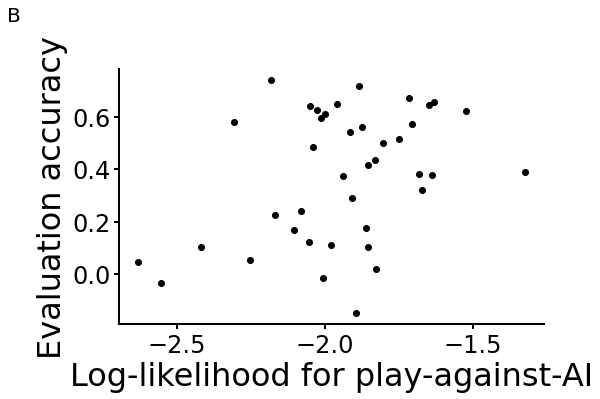

2afc-games: SpearmanrResult(correlation=0.29868667917448405, pvalue=0.06118612285733893)


In [19]:
fig,ax=plt.subplots()
ax.set_xlabel('Log-likelihood for play-against-AI')
ax.set_ylabel('Evaluation accuracy')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.95, 'B', horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
plt.plot(loglik_games,accuracy_eval_model,'ok')
fig.tight_layout()
fig.savefig(fig_direc + 'generalization3_B.pdf')
plt.show()
print("2afc-games:",sts.spearmanr(loglik_games,accuracy_eval_model))

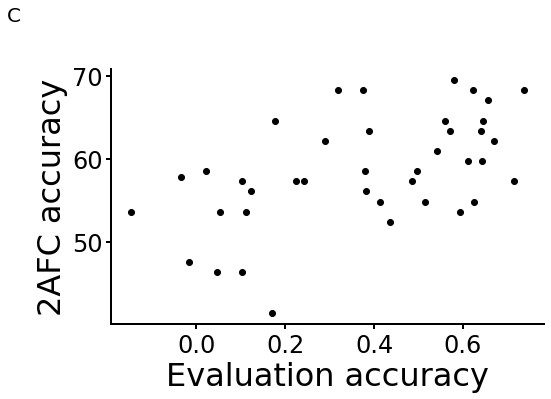

2afc-eval: SpearmanrResult(correlation=0.5123256527126212, pvalue=0.00072576588098596)


In [20]:
fig,ax=plt.subplots()
ax.set_xlabel('Evaluation accuracy')
ax.set_ylabel('2AFC accuracy')
plt.plot(accuracy_eval_model,accuracy_2afc_model,'ok')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.95, 'C', horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
fig.tight_layout()
fig.savefig(fig_direc + 'generalization3_C.pdf')
plt.show()
print("2afc-eval:",sts.spearmanr(accuracy_eval_model,accuracy_2afc_model))

In [21]:
all_beta = [sm.ols(formula="y ~ x1 + x2 + x3", 
        data=pd.DataFrame({'y' : eval_moves[i],
                           'x1': prediction_eval_model[i], 
                           'x2' : prediction_eval_map[i], 
                           'x3' : prediction_eval_oracle[i]})
       ).fit().params for i in range(40)]

for x in ['x1','x2','x3']:
    beta = [b[x] for b in all_beta]
    print(print_mean_and_sem_and_p("\\beta",beta,0,".02f"))

$\beta=0.35\pm 0.07, p<0.001$
$\beta=0.46\pm 0.08, p<0.001$
$\beta=-0.20\pm 0.08, p<0.05$


In [22]:
from scipy.optimize import minimize

def accuracy_2afc(X,beta):
    return np.mean(np.dot(np.vstack(X).T,np.array(beta)/np.sum(beta))>0.5)

def get_beta(i):
    f = lambda beta: 1-accuracy_2afc([prediction_2afc_map[i],
                                     prediction_2afc_model[i],
                                     prediction_2afc_map[i]],beta)
    return minimize(f,[1/3,1/3,1/3], method='COBYLA', options={'disp': False})


In [23]:
f = lambda beta: 1-accuracy_2afc([prediction_2afc_map[0],
                                     prediction_2afc_model[0],
                                     prediction_2afc_map[0]],beta)
f([1,2,0])

0.41463414634146345